# Logistic Regression Classifier

In [14]:
import numpy as np
import sklearn.datasets as data
import sklearn.model_selection as model_select
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import matplotlib.pyplot as plt

In [15]:
STEP_SIZE = 0.1
#FILENAME_TAG = '01'
DEBUGGING = True
#PLOT_DIR = '../plots/'

In [16]:
# load iris data
iris = data.load_iris()
num_classes = len( iris.target_names )
if ( DEBUGGING ):
    print('classes = ', iris.target_names)
    print('attributes = ', iris.feature_names)

classes =  ['setosa' 'versicolor' 'virginica']
attributes =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
# we'll only look at two dimensions (0th and 1st)
# split the data into training and test sets
X = iris.data[:,0:2]
y = iris.target
X_train, X_test, y_train, y_test = model_select.train_test_split( X, y, random_state=0 )
M_train = len( X_train )
M_test = len( X_test )
if ( DEBUGGING ):
    print('number of training instances = ' + str( M_train ))
    print('number of test instances = ' + str( M_test ))

number of training instances = 112
number of test instances = 38


In [19]:
# initialise logistic regression model
clf = linear_model.LogisticRegression( solver='lbfgs', multi_class='multinomial' )

In [20]:
# fit model to iris data
clf.fit( X_train, y_train )

LogisticRegression(multi_class='multinomial')

### How good is your model?

In [23]:
# Find the decision boundary within a 2D grid space, where the two
# dimensions are comprised of the range of values for the two
# attributes we consider here. We use 2 attributes so we can visualise
# easily, but we could use more than two.

In [24]:
# set the limits of the 2D grid space, to make sure that all
# the points in the data set are fully visible in the plot
x0_min = np.min( X[:,0] ) - STEP_SIZE
x0_max = np.max( X[:,0] ) + STEP_SIZE
x1_min = np.min( X[:,1] ) - STEP_SIZE
x1_max = np.max( X[:,1] ) + STEP_SIZE
if ( DEBUGGING ):
    print(x0_min, x0_max, x1_min, x1_max)

4.2 8.0 1.9 4.5


In [25]:
# initialise two arrays, one for each attribute, that contains
# hypothetical values at evenly spaced intervals (STEP_SIZE),
# beginning with the minimum and going up to the maximum value for
# each (e.g., from x0_min to x0_max)
x0_range = np.arange( x0_min, x0_max, STEP_SIZE )
x0_len = len( x0_range ) # save number of items in the x0_range array
x1_range = np.arange( x1_min, x1_max, STEP_SIZE )
x1_len = len( x1_range ) # save number of items in the x1_range array
if ( DEBUGGING ):
    print('x0 range = ', x0_range)
    print('x0_range length = ', x0_len)
    print('x1 range = ', x1_range)
    print('x1_range length = ', x1_len)

x0 range =  [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
 7.8 7.9]
x0_range length =  38
x1 range =  [1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4]
x1_range length =  26


In [26]:
# now we use our classifier to predict the class for all the possible
# combinations of values over the range of the two attributes we are
# using to test the classifier. in order to do this, we need to
# initialise an array that contains pairs of possible attribute
# values. these get sent to the "predict()" function of the
# classifier, which will return a parallel array of predicted classes
# for each attribute pair.
X_pairs = np.zeros(( x0_len * x1_len, 2 ))
if ( DEBUGGING ):
    print('X_pairs shape = ', np.shape( X_pairs ))
i = 0
for i1 in range( x1_len ):
    for i0 in range( x0_len ):
        X_pairs[i] = np.array( [ x0_range[i0], x1_range[i1] ] )
        i += 1
y_hat_pairs = clf.predict( X_pairs )

X_pairs shape =  (988, 2)


In [27]:
#-now let's compute some scores

In [28]:
# first, with the training set
print('training score = ', clf.score( X_train, y_train ))
print('test score = ', clf.score( X_test, y_test ))
print('mesh score = ', clf.score( X_pairs, y_hat_pairs ))
y_hat = clf.predict( X_test )

training score =  0.8392857142857143
test score =  0.7894736842105263
mesh score =  1.0


In [29]:
# compute accuracy score. note that we cannot compute this score for
# the y_hat_pairs data, because we do not have a "ground truth" like
# we do with the test set, i.e., "y_test".
print('accuracy score on test set = ', metrics.accuracy_score( y_test, y_hat ))

accuracy score on test set =  0.7894736842105263


In [30]:
# compute the confusion matrix
cm = metrics.confusion_matrix( y_test, y_hat )
print('confusion matrix =')
# print '%10s\t%s' % ( ' ','predicted-->' )
print('\t predicted-->' )
# print '%10s\t' % ( 'actual:' ),
print( 'actual:', end='' )
for i in range( len( iris.target_names )):
    # print '%10s\t' % ( iris.target_names[i] ),
    print(iris.target_names[i], end='')
# print '\n',
print()
for i in range( len( iris.target_names )):
    # print '%10s\t' % ( iris.target_names[i] ),
    for j in range( len( iris.target_names )):
        # print '%10s\t' % ( cm[i,j] ),
        print( cm[i,j], end='' ),
    # print '\n',
    print()
# print '\n',
print()

confusion matrix =
	 predicted-->
actual:setosaversicolorvirginica
1300
0115
036



In [31]:
# compute precision, recall and f1 scores
print('precision score = tp / (tp + fp) =')
precision = metrics.precision_score( y_test, y_hat, average=None )
for i in range( len( iris.target_names )):
    # print '\t%s = %f' % ( iris.target_names[i], precision[i] )
    print('\t {} = {}'.format( iris.target_names[i], precision[i] ))

precision score = tp / (tp + fp) =
	 setosa = 1.0
	 versicolor = 0.7857142857142857
	 virginica = 0.5454545454545454


In [32]:
print('recall score = tp / (tp + fn) =')
recall = metrics.recall_score( y_test, y_hat, average=None )
for i in range( len( iris.target_names )):
    # print '\t%s = %f' % ( iris.target_names[i], recall[i] )
    print('\t {} = {}'.format( iris.target_names[i], recall[i] ))

recall score = tp / (tp + fn) =
	 setosa = 1.0
	 versicolor = 0.6875
	 virginica = 0.6666666666666666


In [33]:
print('f1 score = 2 * (precision * recall) / (precision + recall) =')
f1 = metrics.f1_score( y_test, y_hat, average=None )
for i in range( len( iris.target_names )):
    # print '\t%s = %f' % ( iris.target_names[i], f1[i] )
    print('\t {} = {}'.format( iris.target_names[i], f1[i] ))

f1 score = 2 * (precision * recall) / (precision + recall) =
	 setosa = 1.0
	 versicolor = 0.7333333333333334
	 virginica = 0.6


In [34]:
# we can compute a "decision function" which gives "confidence scores"
# corresponding to the samples. this is the signed distance from each
# value in X to the decision boundary. we can find the furthest from the boundary
conf_scores = clf.decision_function( X_pairs )
if ( DEBUGGING ):
    print('confidence scores shape =', np.shape( conf_scores ))
    print(conf_scores)
# compute ROC curve for each class
# binarize the output, since we have a multi-class data set
y_binary = preprocess.label_binarize( y_hat_pairs, classes=sorted( set( y )) )
if ( DEBUGGING ):
    print('y binary shape = ',np.shape( y_binary ))

confidence scores shape = (988, 3)
[[ 1.13241267  1.30272912 -2.43514179]
 [ 0.88002928  1.35077619 -2.23080547]
 [ 0.62764589  1.39882326 -2.02646915]
 ...
 [-2.59956554 -0.46253337  3.06209891]
 [-2.85194893 -0.4144863   3.26643523]
 [-3.10433232 -0.36643923  3.47077156]]
y binary shape =  (988, 3)


In [35]:
# compute ROC curve
fpr = dict()
tpr = dict()
for c in range( num_classes ):
    (fpr[c], tpr[c], tmp) = metrics.roc_curve( y_binary[:,c], conf_scores[:,c] )

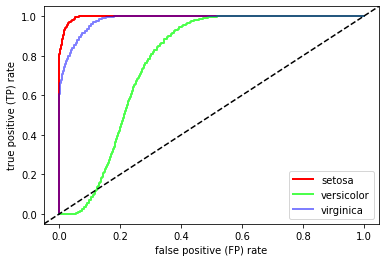

<Figure size 432x288 with 0 Axes>

In [39]:
# plot ROC curve
plt.figure()
colours = [ ( 1, 0, 0, 1 ), ( 0, 1, 0, 0.7 ), ( 0, 0, 1, 0.5 ) ]
for c in range( num_classes ):
    plt.plot( fpr[c], tpr[c], c=colours[c], linewidth=2, label=iris.target_names[c] )
plt.legend( loc='lower right' )
min = -0.05
max = 1.05
plt.plot( [min, max], [min, max], color='k', linestyle='--' )
plt.xlim( [min, max] )
plt.ylim( [min, max] )
plt.xlabel( 'false positive (FP) rate' )
plt.ylabel( 'true positive (TP) rate' )
plt.show()

# PLOT the decision boundary
plt.figure()
plt.set_cmap( 'Blues' )


x0 mesh =  [[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
  6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
  7.8 7.9]
 [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
  6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
  7.8 7.9]
 [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
  6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
  7.8 7.9]
 [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
  6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
  7.8 7.9]
 [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
  6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
  7.8 7.9]
 [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
  6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7
  7.8 7.9]
 [4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5

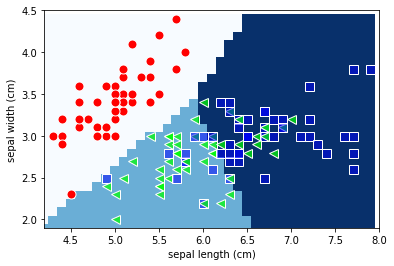

In [47]:
# plot the training points
markers = [ 'o','<','s' ]
for i in range( M_train ):
    plt.plot( X_train[i,0], X_train[i,1], marker=markers[y_train[i]], markeredgecolor='w', markerfacecolor=colours[y_train[i]], markersize=9 )
# and also plot the test points
for i in range( M_test ):
    plt.plot( X_test[i,0], X_test[i,1], marker=markers[y_test[i]], markeredgecolor='w', markerfacecolor=colours[y_test[i]], markersize=9 )
    
    # generate a 2D surface (mesh) that covers all possible combinations
# of the two attribute value ranges we just initialised above so that
# we can use it below to colour the decision boundaries.
x0_mesh, x1_mesh = np.meshgrid( x0_range, x1_range )
if ( DEBUGGING ):
    print('x0 mesh = ', x0_mesh)
    print('x0 mesh shape = ', np.shape( x0_mesh ))
    print('x1 mesh = ', x1_mesh)
    print('x1 mesh shape = ', np.shape( x1_mesh ))
y_hat_mesh = y_hat_pairs.reshape( x0_mesh.shape )
# x0_mesh and x1_mesh are the coordinates of the quadrilateral corners
# for each cell in the colour mesh and y_hat_mesh contains the
# corresponding class for that coordinate pair, which is used to set
# the colour for that quadrilateral.
# plt.pcolormesh( x0_mesh, x1_mesh, y_hat_mesh, shading='flat' )
plt.pcolormesh( x0_mesh, x1_mesh, y_hat_mesh, shading='auto')

# add labels to plot
plt.xlabel( iris.feature_names[0] )
plt.ylabel( iris.feature_names[1] )
plt.xlim( x0_min, x0_max )
plt.ylim( x1_min, x1_max )

# show it!
plt.show()